# Model Building

In [1]:
###GENERAL LIBRARIES####
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

%matplotlib inline

###PREPROCESSING AND TRAIN-TEST SPLIT####
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

###MODELS####
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier 

###MODEL EVALUATION AND HYPERPARAMETER TUNING#####
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, roc_curve

random_state=42

In [2]:
df = pd.read_csv('model_data.csv', index_col='Unnamed: 0')

In [3]:
df.head()

,State_name,County_name,Tract,Med_HHD_Inc_ACS_09_13,Med_House_value_ACS_09_13,has_superfund,pct_Not_HS_Grad_ACS_09_13,pct_Born_foreign_ACS_09_13,pct_Born_US_ACS_09_13,pct_PUB_ASST_INC_ACS_09_13,...,Employed,Unemployed,Emp_Unemp_Ratio,Hispanic_Income,White_Income,Black_Income,Asian_Income,AIAN_Income,SOR_Income,NHOPI_Income
0,Alabama,Autauga County,20100,63030.0,124800.0,0,19.277108,0.276549,99.723451,0.000000,...,870.0,25.0,34.800000,2773320.0,100911030.0,13677510.0,882420.0,819390.0,0.0,0.0
1,Alabama,Autauga County,20200,44019.0,129200.0,0,23.149394,3.057325,96.942675,0.720288,...,880.0,159.0,5.534591,3301425.0,37152036.0,53439066.0,220095.0,220095.0,0.0,0.0
2,Alabama,Autauga County,20300,43201.0,113800.0,0,11.432571,3.990841,96.009159,3.469211,...,1455.0,54.0,26.944444,3758487.0,109644138.0,27951047.0,734417.0,388809.0,0.0,216005.0
3,Alabama,Autauga County,20400,54730.0,130500.0,0,10.255570,2.566432,97.433568,0.971429,...,1929.0,251.0,7.685259,4652050.0,220561900.0,10453430.0,985140.0,602030.0,3283800.0,164190.0
4,Alabama,Autauga County,20500,65132.0,177000.0,0,4.369356,2.792369,97.207631,4.737733,...,5059.0,282.0,17.939716,23121860.0,549583816.0,92357176.0,19213940.0,2865808.0,0.0,390792.0


In [4]:
df.shape

(70219, 41)

In [5]:
df.columns

Index(['State_name', 'County_name', 'Tract', 'Med_HHD_Inc_ACS_09_13',
       'Med_House_value_ACS_09_13', 'has_superfund',
       'pct_Not_HS_Grad_ACS_09_13', 'pct_Born_foreign_ACS_09_13',
       'pct_Born_US_ACS_09_13', 'pct_PUB_ASST_INC_ACS_09_13',
       'pct_TwoPHealth_Ins_ACS_09_13', 'pct_One_Health_Ins_ACS_09_13',
       'pct_Prs_Blw_Pov_Lev_ACS_09_13', 'pct_College_ACS_09_13',
       'pct_Not_HS_Grad_ACS_09_13.1', 'pct_Males_CEN_2010',
       'pct_Females_CEN_2010', 'pct_Pop_Under_5_CEN_2010',
       'pct_Pop_5_17_CEN_2010', 'pct_Pop_18_24_CEN_2010',
       'pct_Pop_25_44_CEN_2010', 'pct_Pop_45_64_CEN_2010',
       'pct_Pop_65plus_CEN_2010', 'pct_No_Health_Ins_ACS_09_13',
       'pct_Hispanic_CEN_2010', 'pct_NH_White_alone_CEN_2010',
       'pct_NH_Blk_alone_CEN_2010', 'pct_NH_Asian_alone_CEN_2010',
       'pct_NH_AIAN_alone_CEN_2010', 'pct_NH_NHOPI_alone_CEN_2010',
       'pct_NH_SOR_alone_CEN_2010', 'Employed', 'Unemployed',
       'Emp_Unemp_Ratio', 'Hispanic_Income', 'White_

### Pretty Matrix Function

In [6]:
def PrettyMatrix(conf_matrix):
    '''
       Creates a confusion matrix with row and columns names for easy
       interpretation. Assumes one has already imported confusion_matrix
       from sklearn and pandas. Also assumes one is making a classification
       for a binary variable.
    '''
    columns = ['Predicted Yes', 'Predicted No']
    rows = ['Actual Yes', 'Actual No']
    return pd.DataFrame(conf_matrix, columns=columns, index=rows)

### Features

In [349]:
#ALL FEATURES!!!
X = df[['Med_HHD_Inc_ACS_09_13',
       'Med_House_value_ACS_09_13', 
       'pct_Not_HS_Grad_ACS_09_13', 'pct_Born_foreign_ACS_09_13',
       'pct_Born_US_ACS_09_13', 'pct_PUB_ASST_INC_ACS_09_13',
       'pct_TwoPHealth_Ins_ACS_09_13', 'pct_One_Health_Ins_ACS_09_13',
       'pct_Prs_Blw_Pov_Lev_ACS_09_13', 'pct_College_ACS_09_13','pct_Males_CEN_2010',
       'pct_Females_CEN_2010', 'pct_Pop_Under_5_CEN_2010',
       'pct_Pop_5_17_CEN_2010', 'pct_Pop_18_24_CEN_2010',
       'pct_Pop_25_44_CEN_2010', 'pct_Pop_45_64_CEN_2010',
       'pct_Pop_65plus_CEN_2010', 'pct_No_Health_Ins_ACS_09_13',
       'pct_Hispanic_CEN_2010', 'pct_NH_White_alone_CEN_2010',
       'pct_NH_Blk_alone_CEN_2010', 'pct_NH_Asian_alone_CEN_2010',
       'pct_NH_AIAN_alone_CEN_2010', 'pct_NH_NHOPI_alone_CEN_2010',
       'pct_NH_SOR_alone_CEN_2010', 'Employed', 'Unemployed',
       'Emp_Unemp_Ratio', 'Hispanic_Income', 'White_Income', 'Black_Income',
       'Asian_Income', 'AIAN_Income', 'SOR_Income', 'NHOPI_Income'
       ]]
y = df.has_superfund

In [7]:
#final run 
X = df[['Med_HHD_Inc_ACS_09_13','Med_House_value_ACS_09_13', 'pct_Not_HS_Grad_ACS_09_13', 'pct_Hispanic_CEN_2010',
        'pct_NH_White_alone_CEN_2010','pct_NH_Blk_alone_CEN_2010','pct_NH_Asian_alone_CEN_2010','Emp_Unemp_Ratio', 'Hispanic_Income', 
        'White_Income', 'Black_Income', 'Asian_Income', 'pct_Prs_Blw_Pov_Lev_ACS_09_13', 'pct_No_Health_Ins_ACS_09_13'
       ]]
y = df.has_superfund

In [8]:
X.shape

(70219, 14)

In [9]:
df.has_superfund.value_counts()

0    69051
1     1168
Name: has_superfund, dtype: int64

### No oversampling/undersampling

In [10]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.30, random_state=21) 

In [12]:
random.seed(48)

no_superfund = df[df['has_superfund'] == 0]
superfund = df[df['has_superfund'] == 1 ]

In [13]:
counts = df['has_superfund'].value_counts()
proportion_under = counts[1]/counts[0]

balanced_under = superfund.append(no_superfund.sample(frac=proportion_under))

In [14]:
balanced_under['has_superfund'].value_counts()

1    1168
0    1168
Name: has_superfund, dtype: int64

In [15]:
Xu = balanced_under[['Med_HHD_Inc_ACS_09_13','Med_House_value_ACS_09_13', 'pct_Not_HS_Grad_ACS_09_13', 'pct_Hispanic_CEN_2010', 
                    'pct_NH_White_alone_CEN_2010','pct_NH_Blk_alone_CEN_2010','pct_NH_Asian_alone_CEN_2010',
                     'Emp_Unemp_Ratio', 'Hispanic_Income', 
        'White_Income', 'Black_Income', 'Asian_Income', 'pct_Prs_Blw_Pov_Lev_ACS_09_13', 'pct_No_Health_Ins_ACS_09_13'
       ]]
yu = balanced_under.has_superfund

In [16]:
Xus = ss.fit_transform(Xu)

In [17]:
X_trainu, X_testu, y_trainu, y_testu, = train_test_split(Xus, yu, test_size=0.30, random_state=22)

### Oversampling

In [18]:
counts2 = df['has_superfund'].value_counts()
proportion_over = counts2[0]/counts2[1]
balanced_over = no_superfund.append(superfund.sample(frac=proportion_over, replace=True))

balanced_over['has_superfund'].value_counts()

1    69051
0    69051
Name: has_superfund, dtype: int64

In [19]:
Xo = balanced_over[['Med_HHD_Inc_ACS_09_13','Med_House_value_ACS_09_13', 'pct_Not_HS_Grad_ACS_09_13', 'pct_Hispanic_CEN_2010', 
                     'pct_NH_White_alone_CEN_2010','pct_NH_Blk_alone_CEN_2010','pct_NH_Asian_alone_CEN_2010',
                     'Emp_Unemp_Ratio', 'Hispanic_Income', 
        'White_Income', 'Black_Income', 'Asian_Income', 'pct_Prs_Blw_Pov_Lev_ACS_09_13', 'pct_No_Health_Ins_ACS_09_13'
       ]]
yo = balanced_over.has_superfund

In [20]:
Xos = ss.fit_transform(Xo)

In [21]:
X_traino, X_testo, y_traino, y_testo, = train_test_split(Xos, yo, test_size=0.30, random_state=21)

### Logistic Regression

In [365]:
%%time
random_state=94

lr_params = {
    'class_weight': [{0:0.4}],
    'C': [0.01],
    'penalty': ['l1']
}
lr_gs = GridSearchCV(LogisticRegression(), lr_params, verbose=1, cv=5)
lr_gs.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
CPU times: user 256 ms, sys: 64.4 ms, total: 320 ms
Wall time: 332 ms


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [366]:
print(lr_gs.best_score_)
print(lr_gs.best_params_)

0.9832360181474172
{'C': 0.01, 'class_weight': {0: 0.4}, 'penalty': 'l1'}


In [367]:
lr = LogisticRegression(class_weight={0:0.04},C=0.01,penalty='l1',random_state=95)
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight={0: 0.04}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=95,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [369]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
print(lr_scores)
print(np.mean(lr_scores))

[0.98321636 0.98321636 0.98321636 0.98321636 0.98331468]
0.9832360213480233


In [370]:
lr_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)

In [371]:
CM_lr = confusion_matrix(lr_pred, y_test)
PrettyMatrix(CM_lr)

,Predicted Yes,Predicted No
Actual Yes,20722,344
Actual No,0,0


In [372]:
roc_auc_score(y_test, lr_prob[:,1])

0.569927015552508

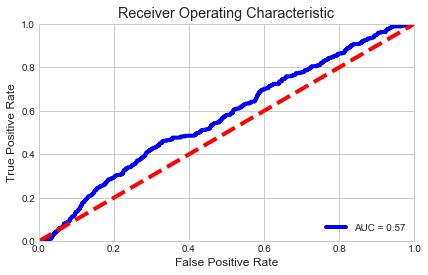

In [373]:
fpr, tpr, threshold = roc_curve(y_test, lr_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Undersampling with Logistic Regression

In [378]:
%%time
random_state=96

lru_params = {
    'class_weight': ['balanced'],
    'C': [0.1, 1.0],
    'penalty': ['l2']
}
lru_gs = GridSearchCV(LogisticRegression(), lru_params, verbose=1, cv=5)
lru_gs.fit(X_trainu,y_trainu)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
CPU times: user 122 ms, sys: 5.25 ms, total: 127 ms
Wall time: 127 ms


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished


In [380]:
print(lru_gs.best_score_)
print(lru_gs.best_params_)
print(lru_gs.best_estimator_)

0.563302752293578
{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [381]:
lru = LogisticRegression(class_weight='balanced',C=0.1,penalty='l2',random_state=95)
lru.fit(X_trainu, y_trainu)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=95,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [384]:
lru_scores = cross_val_score(lru, X_trainu, y_trainu, cv=5)
print(lru_scores)
print(np.mean(lru_scores))

[0.58409786 0.56880734 0.59633028 0.5382263  0.52905199]
0.5633027522935781


In [385]:
lru_pred = lru.predict(X_test)
lru_prob = lru.predict_proba(X_test)

In [386]:
CM_lru = confusion_matrix(lru_pred, y_test)
PrettyMatrix(CM_lru)

,Predicted Yes,Predicted No
Actual Yes,9867,120
Actual No,10855,224


In [387]:
print(224/(224+120)) #sensitivity

0.6511627906976745


In [388]:
print(224/(224+10855)) #precision

0.02021843126635978


In [389]:
roc_auc_score(y_test, lru_prob[:,1])

0.6027393647466012

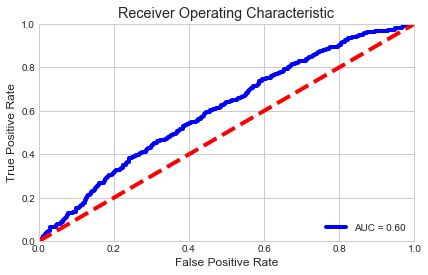

In [390]:
fpr, tpr, threshold = roc_curve(y_test, lru_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Oversampling

In [396]:
%%time
random_state=96

lro_params = {
    'class_weight': ['balanced'],
    'C': [0.01, 0.1],
    'penalty': ['l1']
}
lro_gs = GridSearchCV(LogisticRegression(), lro_params, verbose=1, cv=5)
lro_gs.fit(X_traino,y_traino)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.6s finished


CPU times: user 8.12 s, sys: 297 ms, total: 8.42 s
Wall time: 8.59 s


In [397]:
print(lro_gs.best_score_)
print(lro_gs.best_params_)
print(lro_gs.best_estimator_)

0.573470844410423
{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1'}
LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [398]:
lro = LogisticRegression(class_weight='balanced',C=0.1,penalty='l1',random_state=97)

In [399]:
lro.fit(X_traino, y_traino)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=97,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [400]:
lro_scores = cross_val_score(lro, Xos, yo, cv=5)
print(lro_scores)
print(np.mean(lro_scores))

[0.54025777 0.53258508 0.53088342 0.50629978 0.55220854]
0.5324469187868855


In [401]:
lro_pred = lro.predict(X_test)
lro_prob = lro.predict_proba(X_test)

In [402]:
CM_lro = confusion_matrix(lro_pred, y_test)
PrettyMatrix(CM_lro)

,Predicted Yes,Predicted No
Actual Yes,9662,119
Actual No,11060,225


In [403]:
print(225/(225+119)) #sensitivity

0.6540697674418605


In [404]:
print(225/(11060+225)) #precision

0.01993797075764289


In [405]:
roc_auc_score(y_test, lro_prob[:,1])

0.6048190834143243

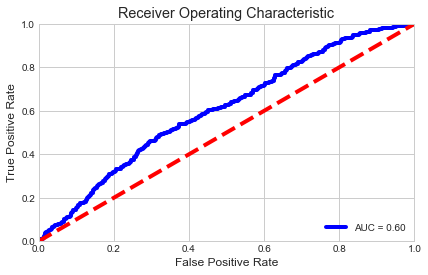

In [406]:
fpr, tpr, threshold = roc_curve(y_test, lro_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### The Logistic Regression continued to perform awfully so I will not include this into consideration as the model to make predictions. 


###  Random Forest Classifier

#### Undersampling

In [457]:
random_state=100
ranforu_params = {
      'class_weight': [{0:.4}],
      'max_features':['log2'],
      'n_estimators': [125],
      'max_depth': [75,125],
      'min_samples_split': [2],
}
ranforu_gs = GridSearchCV(RandomForestClassifier(),ranforu_params, verbose=1, cv=5)
ranforu_gs.fit(X_trainu, y_trainu)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'class_weight': [{0: 0.4}], 'max_features': ['log2'], 'n_estimators': [125], 'max_depth': [75, 125], 'min_samples_split': [2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [458]:
print(ranforu_gs.best_score_)
print(ranforu_gs.best_params_)
print(ranforu_gs.best_estimator_)

0.5773700305810398
{'class_weight': {0: 0.4}, 'max_depth': 75, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 125}
RandomForestClassifier(bootstrap=True, class_weight={0: 0.4},
            criterion='gini', max_depth=75, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [461]:
ranforu = RandomForestClassifier(class_weight={0:0.4},max_depth=75, min_samples_split=2,
                                max_features='log2', n_estimators=125, random_state=101) 
ranforu.fit(X_trainu, y_trainu)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.4},
            criterion='gini', max_depth=75, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=125, n_jobs=1, oob_score=False, random_state=101,
            verbose=0, warm_start=False)

In [463]:
ranforu_score = cross_val_score(ranforu, X_trainu, y_trainu, cv=5)
print(ranforu_score)
print(np.mean(ranforu_score))

[0.56269113 0.59633028 0.60550459 0.58103976 0.58103976]
0.5853211009174313


#### Random Forest Undersampling Evaluation

In [464]:
ranforu_pred = ranforu.predict(X_test)

In [465]:
ranforu_prob = ranforu.predict_proba(X_test)

In [466]:
CM_ranforu = confusion_matrix(ranforu_pred, y_test)

In [467]:
PrettyMatrix(CM_ranforu)

,Predicted Yes,Predicted No
Actual Yes,17691,204
Actual No,3031,140


In [468]:
print(140/(140+204)) #sensitivity

0.4069767441860465


In [469]:
print(140/(140+3031)) #precision

0.04415011037527594


In [470]:
roc_auc_score(y_test, ranforu_prob[:,1])

0.6924272147565894

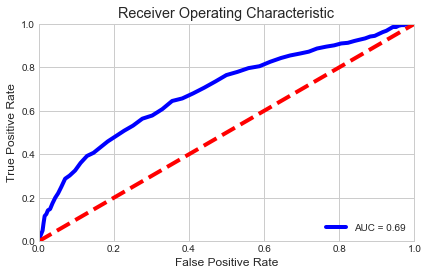

In [471]:
fpr, tpr, threshold = roc_curve(y_test, ranforu_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [472]:
features_ranforu = pd.DataFrame(list(zip(X.columns,ranforu.feature_importances_))
                        ,columns=['feature','importance'])

In [473]:
features_ranforu

,feature,importance
0,Med_HHD_Inc_ACS_09_13,0.070219
1,Med_House_value_ACS_09_13,0.071037
2,pct_Not_HS_Grad_ACS_09_13,0.082984
3,pct_Hispanic_CEN_2010,0.072123
4,pct_NH_White_alone_CEN_2010,0.069540
5,pct_NH_Blk_alone_CEN_2010,0.069815
6,pct_NH_Asian_alone_CEN_2010,0.067511
7,Emp_Unemp_Ratio,0.071065
8,Hispanic_Income,0.066679
9,White_Income,0.076597


Text(0,0.5,'Feature importance')

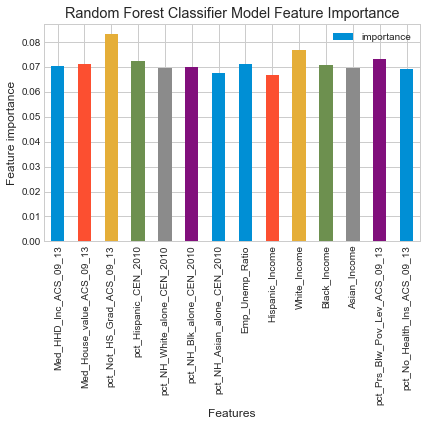

In [474]:
features_ranforu.plot(kind='bar', title='Random Forest Classifier Model Feature Importance', 
                        x='feature', y='importance', sort_columns=True)
plt.xticks(rotation = 90)
plt.xlabel('Features', fontsize='large')
plt.ylabel('Feature importance', fontsize='large')

#### Oversampling

In [ ]:
random_state = 102
ranforo_params = {
    'max_features':['sqrt'],
    'n_estimators': [800],
    'class_weight': [{0:.3}],
    'max_depth': [15],
    'min_samples_split': [2]
}
ranforo_gs = GridSearchCV(RandomForestClassifier(),ranforo_params, verbose=1, cv=5)
ranforo_gs.fit(X_traino, y_traino)

In [ ]:
print(ranforo_gs.best_score_)
print(ranforo_gs.best_params_)
print(ranforo_gs.best_estimator_)

In [287]:
ranforo = RandomForestClassifier(class_weight={0:.3}, max_depth=15, max_features='sqrt', 
                                min_samples_split=2, n_estimators=800, random_state=103)
ranforo.fit(X_traino, y_traino)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=800, n_jobs=1, oob_score=False, random_state=103,
            verbose=0, warm_start=False)

In [288]:
ranforo_score = cross_val_score(ranforo, X_traino, y_traino, cv=5)
print(ranforo_score)
print(np.mean(ranforo_score))

[0.95443496 0.95893457 0.96100134 0.95520844 0.9563958 ]
0.9571950245811814


#### Random Forest Oversampling Evaluation

In [289]:
ranforo_pred = ranforo.predict(X_test)

In [290]:
ranforo_prob = ranforo.predict_proba(X_test)

In [291]:
CM_ranforo = confusion_matrix(ranforo_pred, y_test)

In [292]:
PrettyMatrix(CM_ranforo)

,Predicted Yes,Predicted No
Actual Yes,20706,341
Actual No,16,3


In [293]:
print(3/(341+3)) #sensitivity

0.00872093023255814


In [294]:
print(3/(16+3)) #precision

0.15789473684210525


In [295]:
roc_auc_score(y_test, ranforo_prob[:,1])

0.7667567106524242

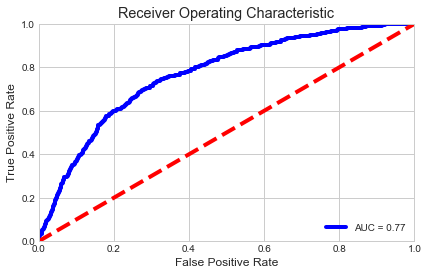

In [296]:
fpr, tpr, threshold = roc_curve(y_test, ranforo_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [297]:
features_ranforo = pd.DataFrame(list(zip(X.columns,ranforo.feature_importances_))
                        ,columns=['feature','importance'])

In [300]:
features_ranforo

,feature,importance
0,Med_HHD_Inc_ACS_09_13,0.063202
1,Med_House_value_ACS_09_13,0.069869
2,pct_Not_HS_Grad_ACS_09_13,0.069241
3,pct_Hispanic_CEN_2010,0.066084
4,pct_Not_HS_Grad_ACS_09_13,0.068332
5,pct_NH_White_alone_CEN_2010,0.072528
6,pct_NH_Blk_alone_CEN_2010,0.062961
7,pct_NH_Asian_alone_CEN_2010,0.069270
8,Emp_Unemp_Ratio,0.064315
9,Hispanic_Income,0.061534


Text(0,0.5,'Feature importance')

<Figure size 50000x20000 with 0 Axes>

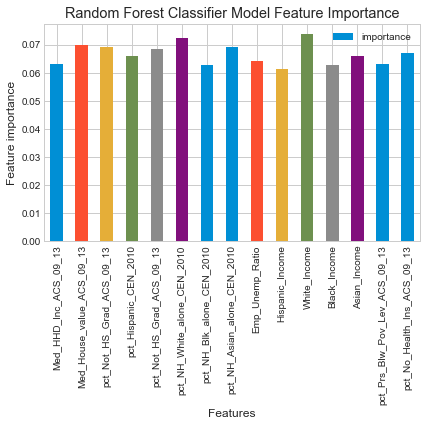

In [298]:
plt.figure(figsize=(50, 20), dpi=1000, facecolor='w', edgecolor='k')
features_ranforo.plot(kind='bar', title='Random Forest Classifier Model Feature Importance', 
                        x='feature', y='importance', sort_columns=True)
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Feature importance')

### AdaBoost Classifier

#### Undersampling

In [504]:
random_state=104
adaboostu_params = {
    'n_estimators': [125,300],
    'learning_rate':[0.1]
}
adaboostu_gs = GridSearchCV(AdaBoostClassifier(), adaboostu_params, verbose=1, cv=5)
adaboostu_gs.fit(X_trainu, y_trainu)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [125, 300], 'learning_rate': [0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [505]:
print(adaboostu_gs.best_score_)
print(adaboostu_gs.best_params_)
print(adaboostu_gs.best_estimator_)

0.5626911314984709
{'learning_rate': 0.1, 'n_estimators': 125}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=125, random_state=None)


In [506]:
adaboostu = AdaBoostClassifier(n_estimators=125,learning_rate=0.1,random_state=104)
adaboostu.fit(X_trainu, y_trainu)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=125, random_state=104)

In [507]:
adaboostu_score = cross_val_score(adaboostu, X_trainu, y_trainu, cv=5)
print(adaboostu_score)
print(np.mean(adaboostu_score))

[0.5412844  0.57798165 0.57798165 0.56880734 0.54740061]
0.5626911314984709


#### Adaboost Classifier Undersampling Evaluation

In [508]:
adaboostu_pred = adaboostu.predict(X_test)

In [509]:
adaboostu_prob = adaboostu.predict_proba(X_test)

In [510]:
CM_adaboostu = confusion_matrix(adaboostu_pred, y_test)

In [511]:
PrettyMatrix(CM_adaboostu)

,Predicted Yes,Predicted No
Actual Yes,11092,133
Actual No,9630,211


In [512]:
roc_auc_score(y_test, adaboostu_prob[:,1])

0.6058068971747812

In [513]:
print(211/(9630+211)) #precision

0.021440910476577583


In [514]:
print(211/(133+211)) #sensitivity

0.6133720930232558


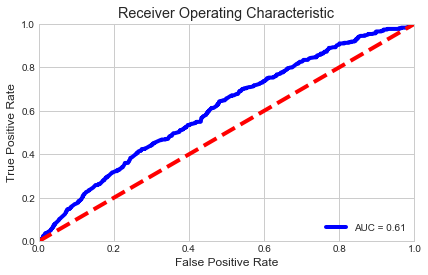

In [515]:
fpr, tpr, threshold = roc_curve(y_test, adaboostu_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [516]:
features_adaboostu = pd.DataFrame(list(zip(X.columns,adaboostu.feature_importances_))
                        ,columns=['feature','importance'])

In [517]:
features_adaboostu

,feature,importance
0,Med_HHD_Inc_ACS_09_13,0.016
1,Med_House_value_ACS_09_13,0.024
2,pct_Not_HS_Grad_ACS_09_13,0.112
3,pct_Hispanic_CEN_2010,0.080
4,pct_NH_White_alone_CEN_2010,0.056
5,pct_NH_Blk_alone_CEN_2010,0.104
6,pct_NH_Asian_alone_CEN_2010,0.088
7,Emp_Unemp_Ratio,0.064
8,Hispanic_Income,0.024
9,White_Income,0.216


Text(0,0.5,'Feature importance')

<Figure size 25000x10000 with 0 Axes>

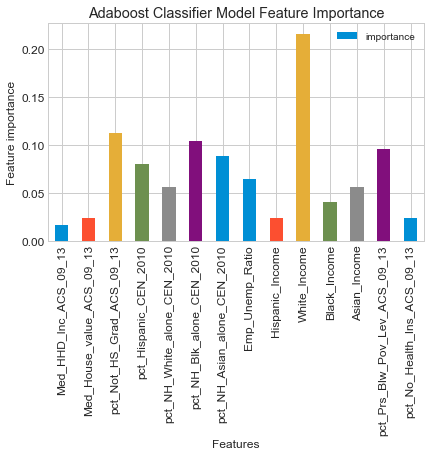

In [518]:
plt.figure(figsize=(50, 20), dpi=500, facecolor='w', edgecolor='k')
features_adaboostu.plot(kind='bar', title='Adaboost Classifier Model Feature Importance', 
                        x='feature', y='importance', fontsize='large')
plt.xticks(rotation = 90)
plt.xlabel('Features', fontsize='large')
plt.ylabel('Feature importance', fontsize='large')

Important features:

- Median household income
- Median House value
- Percentage of population under 5 years old
- Percentage of population between 45 and 64 years old
- Percentage of population 65 years and older
- Hispanic, income interaction feature

BUT what does having a population as a highly valued feature importance mean? Does it mean a higher population? Does it mean a lower population? High mean population? 

Not so important features:

- Not a high school graduate
- Foreign born
- Born in the US
- NHOPI Income
- AIAN, NHOPI, SOR percentage


#### Oversampling

In [525]:
%%time
random_state=105
adaboosto_params = {
    'n_estimators': [1200],
    'learning_rate':[0.1]
}
adaboosto_gs = GridSearchCV(AdaBoostClassifier(), adaboosto_params, verbose=1, cv=5)
adaboosto_gs.fit(X_traino, y_traino)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 11.6min finished


CPU times: user 13min 39s, sys: 6.94 s, total: 13min 46s
Wall time: 14min 9s


In [526]:
print(adaboosto_gs.best_score_)
print(adaboosto_gs.best_params_)
print(adaboosto_gs.best_estimator_)

0.6447435114977604
{'learning_rate': 0.1, 'n_estimators': 1200}


In [527]:
adaboosto = AdaBoostClassifier(n_estimators=1200, learning_rate=0.1, random_state=106)

In [528]:
adaboosto.fit(X_traino,y_traino)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=1200, random_state=106)

In [529]:
adaboosto_score = cross_val_score(adaboosto, X_traino, y_traino, cv=5)
print(adaboosto_score)
print(np.mean(adaboosto_score))

[0.6478407  0.64582364 0.64611565 0.64156408 0.64237314]
0.64474344376544


#### Adaboost Classifier Oversampling Evaluation

In [530]:
adaboosto_pred = adaboosto.predict(X_test)

In [531]:
adaboosto_prob = adaboosto.predict_proba(X_test)

In [532]:
CM_adaboosto = confusion_matrix(adaboosto_pred, y_test)

In [533]:
PrettyMatrix(CM_adaboosto)

,Predicted Yes,Predicted No
Actual Yes,7039,73
Actual No,13683,271


In [534]:
roc_auc_score(adaboosto_pred, y_test)

0.5045783063038719

In [535]:
print(271/(73+271)) #sensitivity

0.7877906976744186


In [536]:
print(271/(13683+271)) #specificity

0.019420954564999284


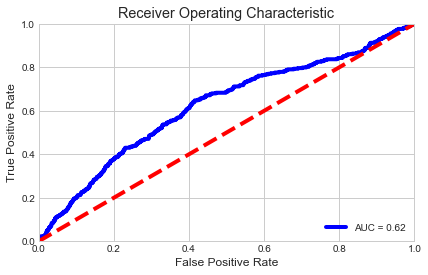

In [537]:
fpr, tpr, threshold = roc_curve(y_test, adaboosto_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [623]:
features_adaboosto = pd.DataFrame(list(zip(X.columns,adaboosto.feature_importances_))
                        ,columns=['feature','importance'])

Text(0,0.5,'Feature importance')

<Figure size 1000x500 with 0 Axes>

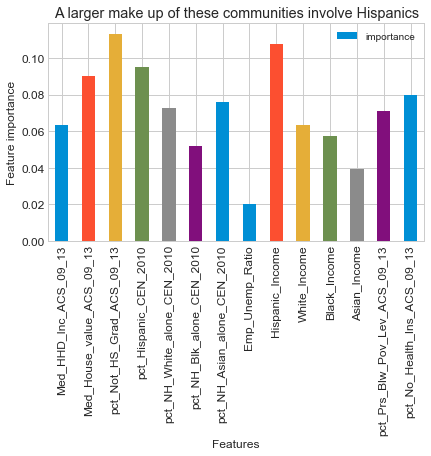

In [627]:
plt.figure(figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
features_adaboosto.plot(kind='bar', title='A larger make up of these communities involve Hispanics', 
                        x='feature', y='importance', fontsize='large', sort_columns=True)
plt.xticks(rotation = 90)
plt.xlabel('Features', fontsize='large')
plt.ylabel('Feature importance', fontsize='large')

### Gradient Boosting Classifier

#### Undersampling

In [595]:
%%time
random_state=107
gradboostu_params = {
    'learning_rate': [0.1],
    'n_estimators': [2000],
    'max_depth': [100],
    'max_features': ['log2'],
    'min_samples_leaf': [5]
}
gradboostu_gs = GridSearchCV(GradientBoostingClassifier(), gradboostu_params, verbose=1, cv=5)
gradboostu_gs.fit(X_trainu, y_trainu)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   17.6s finished


CPU times: user 18.7 s, sys: 144 ms, total: 18.9 s
Wall time: 19.4 s


In [596]:
print(gradboostu_gs.best_params_)
print(gradboostu_gs.best_score_)
print(gradboostu_gs.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 100, 'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 2000}
0.5669724770642202
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=100,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=2000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


In [597]:
gradboostu = GradientBoostingClassifier(learning_rate=0.1, n_estimators=2000, max_depth=100, max_features='sqrt', 
                                        min_samples_leaf=5, random_state=108)
gradboostu.fit(X_trainu, y_trainu)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=100,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=2000,
              presort='auto', random_state=108, subsample=1.0, verbose=0,
              warm_start=False)

In [598]:
gradboostu_score = cross_val_score(gradboostu, X_trainu, y_trainu, cv=5)
print(gradboostu_score)
print(np.mean(gradboostu_score))

[0.5351682  0.56574924 0.54740061 0.55351682 0.59021407]
0.5584097859327217


#### Gradient Boosting Classifier Undersampling Evaluation

In [599]:
gradboostu_pred = gradboostu.predict(X_test)

In [600]:
gradboostu_prob = gradboostu.predict_proba(X_test)

In [601]:
CM_gradboostu = confusion_matrix(gradboostu_pred, y_test)

In [602]:
PrettyMatrix(CM_gradboostu)

,Predicted Yes,Predicted No
Actual Yes,13734,160
Actual No,6988,184


In [603]:
roc_auc_score(y_test, gradboostu_prob[:,1])

0.6445384132805714

In [604]:
print(184/(160+184)) #sensitivity

0.5348837209302325


In [605]:
print(184/(6988+184)) #precision

0.025655326268823202


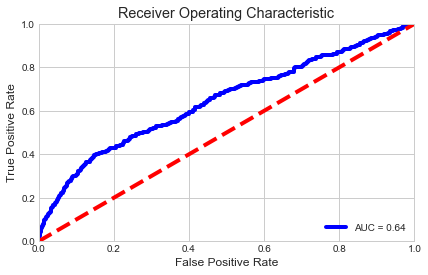

In [606]:
fpr, tpr, threshold = roc_curve(y_test, gradboostu_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [607]:
features_gradboostu = pd.DataFrame(list(zip(X.columns,gradboostu.feature_importances_))
                        ,columns=['feature','importance'])

Text(0,0.5,'Feature importance')

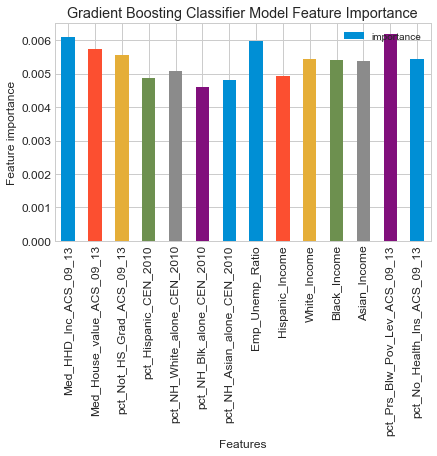

In [608]:
features_gradboostu.plot(kind='bar', title='Gradient Boosting Classifier Model Feature Importance', 
                        x='feature', y='importance', fontsize='large')
plt.xticks(rotation = 90)
plt.xlabel('Features', fontsize='large')
plt.ylabel('Feature importance', fontsize='large')

#### Oversampling

In [609]:
%%time
random_state=109
gradboosto_params = {
    'learning_rate': [1.0],
    'n_estimators': [1200],
    'max_depth': [100],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2,5]
}
gradboosto_gs = GridSearchCV(GradientBoostingClassifier(), gradboosto_params, verbose=1, cv=5)
gradboosto_gs.fit(X_traino, y_traino)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.2min finished


CPU times: user 3min 29s, sys: 2.24 s, total: 3min 31s
Wall time: 3min 34s


In [610]:
print(gradboosto_gs.best_score_)
print(gradboosto_gs.best_params_)
print(gradboosto_gs.best_estimator_)

0.9994724374424595
{'learning_rate': 1.0, 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 1200}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=100,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


In [611]:
gradboosto = GradientBoostingClassifier(learning_rate=1.0, n_estimators=1200, max_depth=100, max_features='sqrt', 
                                        min_samples_leaf=2,random_state=110)
gradboosto.fit(X_traino, y_traino)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=100,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1200,
              presort='auto', random_state=110, subsample=1.0, verbose=0,
              warm_start=False)

In [612]:
gradboosto_score = cross_val_score(gradboosto, X_traino, y_traino, cv=5)
print(gradboosto_score)
print(np.mean(gradboosto_score))

[0.99937936 0.9992242  0.99948278 0.99937933 0.99927585]
0.9993483052889307


#### Gradient Boosting Classifier Oversampling Evaluation

In [613]:
gradboosto_pred = gradboosto.predict(X_test)

In [614]:
gradboosto_prob = gradboosto.predict_proba(X_test)

In [615]:
CM_gradboosto = confusion_matrix(gradboosto_pred, y_test)

In [616]:
PrettyMatrix(CM_gradboosto)

,Predicted Yes,Predicted No
Actual Yes,20717,333
Actual No,5,11


In [617]:
roc_auc_score(y_test, gradboosto_prob[:,1])

0.6928310940175928

In [618]:
print(11/(333+11)) #sensitivity

0.03197674418604651


In [619]:
print(11/(5+11)) #precision

0.6875


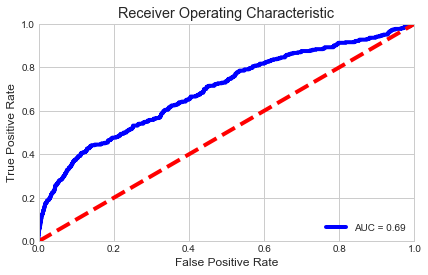

In [620]:
fpr, tpr, threshold = roc_curve(y_test, gradboosto_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [621]:
features_gradboosto = pd.DataFrame(list(zip(X.columns,gradboosto.feature_importances_))
                        ,columns=['feature','importance'])

Text(0,0.5,'Feature importance')

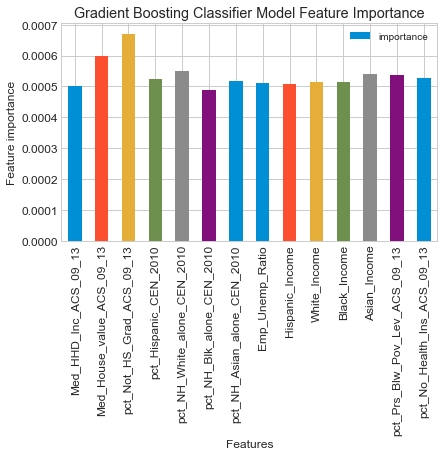

In [622]:
features_gradboosto.plot(kind='bar', title='Gradient Boosting Classifier Model Feature Importance', 
                        x='feature', y='importance', fontsize='large')
plt.xticks(rotation = 90)
plt.xlabel('Features', fontsize='large')
plt.ylabel('Feature importance', fontsize='large')

## Model Summary

My models have a relatively decent sensitivity, which is the classification metric that I am trying to optimize here, but my precision is very poor at almost zero. Also the feature importances are varying among the models, which means I cannot come to a sure conclusion about what are the important features regarding communities that in close proximity to Superfund sites. The biggest issue that I realized after building these models is that among observations that have a Superfund site and observations that do not have a Superfund site, the distribution of the features are very similar, thus they cannot discriminate between classes. 

More data needs to be collected and the data needs to be able to discriminate between classes, or any classification won't work regardless if the features are good or not.